In [2]:
# ===============================
# !!! DEGRADE IRF SENSITIVITY !!!
# ===============================

import gammalib
import ctools
import cscripts
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from module_analysis import *

path = '/home/ambra/Desktop/cluster-morgana/irf_degraded/'
model = '$CTOOLS/share/models/crab.xml'
event1 = path + 'crab.fits'
event2 = path + 'crab_degraded.fits'
output1 = path + 'prod2_sens.csv'
output2 = path + 'degr2_sens.csv'
results1 = path + 'prod2_results.xml'
results2 = path + 'degr2_results.xml'
irf = 'South_0.5h'

do_sens = True

if do_sens is True :
    simulate_event(model, event1, t=[0, 1e3], e=[0.03, 150.0], caldb='prod2', irf=irf)
    simulate_event(model, event2, t=[0, 1e3], e=[0.03, 150.0], caldb='degr2', irf=irf)

    max_likelihood(event1, model, results1, caldb='prod2', irf=irf) 
    max_likelihood(event2, model, results2, caldb='degr2', irf=irf) 
    
    sensitivity(results1, event1, output1, caldb='prod2', irf=irf, t=1e3)
    sensitivity(results2, event2, output2, caldb='degr2', irf=irf, t=1e3)

    
print('done')

done


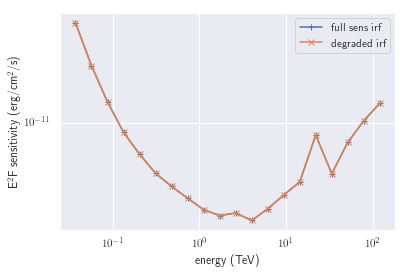

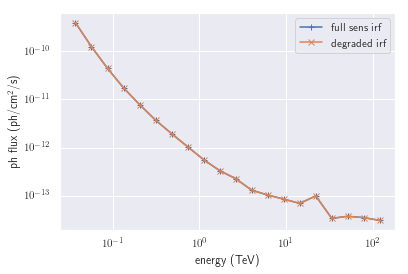

In [3]:
# ====================================
# !!! PLOT DEGRADE IRF SENSITIVITY !!!
# ====================================

import csv
import pandas as pd

from module_plot import *

savefig1 = path + 'sensitivity_differential.png'
savefig2 = path + 'sens_phflux_differential.png'

df1 = pd.read_csv(output1)
df2 = pd.read_csv(output2)
cols = list(df1.columns)
energy1 = np.array(df1[cols[0]])
energy2 = np.array(df2[cols[0]])
sens1 = np.array(df1[cols[6]])
sens2 = np.array(df2[cols[6]])

flux1 = np.array(df2[cols[4]])
flux2 = np.array(df2[cols[4]])

showSensitivity([10**energy1, 10**energy2], [sens1, sens2], savefig1, marker=['+', 'x'],
                xlabel='energy (TeV)', ylabel='E$^2$F sensitivity (erg/cm$^2$/s)', 
                label=['full sens irf', 'degraded irf'], fontsize=12)

showSensitivity([10**energy1, 10**energy2], [flux1, flux2], savefig2, marker=['+', 'x'],
                xlabel='energy (TeV)', ylabel='ph flux (ph/cm$^2$/s)', 
                label=['full sens irf', 'degraded irf'], fontsize=12)